## Table of Content

### 1. Introduction
- 1.1 Data Description
- 1.2 Feature Description
- 1.3 Objective of this project

### 2. Fetching Data
- 2.1 Import necessary Libraries
- 2.2 Import data

### 3. EDA
### 4. Encoding Dataframe
### 5. Describe the dataset
### 6. Building Model for predicting capacity_mw (Regression model)
- 6.1 Checking Multicollinearity
- 6.2 Linear Regression
- 6.3 Random Forest Regressor
- 6.4 Gradient Boosting Regressor
- 6.5 KKN Regressor
- 6.6 XGBRegressor
- 6.7 Ridge

### 7. Selecting Best Model
### 8. Hyperparameter Tuning
### 9. Documenting of Finding
### 10. Model Save

### 11. Building Model for predicting the primary_fuel (classification model)
- 11.1 Checking Multicollinearity
- 11.2 Balancing Data
- 11.3 Logistic Regression
- 11.4 Random Forest Classifier
- 11.6 Gradient Boosting Classifier
- 11.7 KNN Classifier


### 12. Selecting Best Model
### 13. Hyperparameter Tuning
### 14. ROC_AUC Curve
### 15. Model Save

## 1. Introduction
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

###  1.1 Data Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### 1.2 Features Discription
#### The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


### 1.3 Objective of this project

- The goal of this machine learning project is to predict the Primary_fuel and Capacity_mw.
- This is the classification problem

## 2. Fetching Data

### 2.1 Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.set_option('display.max_rows', None)

### 2.2 Importing Dataset

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [5]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
data.shape

(907, 27)

### Droping Duplicates

In [7]:
data.drop_duplicates()
data.shape

(907, 27)

- No duplicates values are present.

### Checking unique values

In [8]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

- Our 1st model label i.e. primary fuel has 8 unique class.
- Country and Country long column has only 1 country name i.e India. I will drop this columns.
- year_of_capacity_data contain only one unique value i.e. 2019 so i will drop this columns.
- generation_data_source i will drop this column becouse it has only one unique value.
- gppd_idnr i will drop this column becouse it has only ID.

# 3. EDA

### Checking Null Values

In [9]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

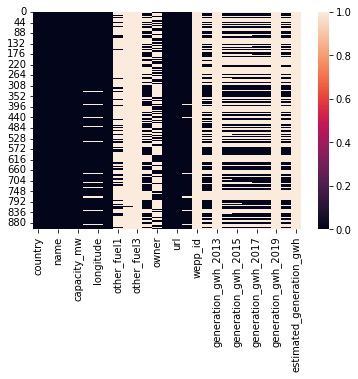

In [10]:
sns.heatmap(data.isnull())

 - We can see, most of the features is having Null values.
 - But we can see, `other_fuel1`, `other_fuel2` and `other_fuel3` in this columns > 90% data is missing.
 - `generation_gwh_2013`, `estimated_generation_gwh`, `wepp_id` and `generation_gwh_2019` all value is missing.

## Data Cleaning

### Droping features fron above observation

In [11]:
# Droping feature whose having empty. Complete all null values present
# generation_gwh_2019 - all value is null
data.drop(['estimated_generation_gwh','wepp_id','generation_gwh_2019','generation_gwh_2013','other_fuel3','other_fuel2',],axis=1,inplace=True)

In [12]:
data.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

### Filling Missing values

In [13]:
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())
data['longitude'] = data['longitude'].fillna(data['longitude'].mean())
data['other_fuel1'] = data['other_fuel1'].fillna(data['other_fuel1'].mode()[0])

data['commissioning_year'] = data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])
data['owner'] = data['owner'].fillna(data['owner'].mode()[0])
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

data['year_of_capacity_data'] = data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])
data['generation_gwh_2014'] = data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())
data['generation_gwh_2015'] = data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())

data['generation_gwh_2016'] = data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())
data['generation_gwh_2017'] = data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())
data['generation_gwh_2018'] = data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())

data['generation_data_source'] = data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])


In [14]:
data.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

 - After filling the null values, No null values present.

### Checking all information

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    object 
 1   country_long            907 non-null    object 
 2   name                    907 non-null    object 
 3   gppd_idnr               907 non-null    object 
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    object 
 8   other_fuel1             907 non-null    object 
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    object 
 11  source                  907 non-null    object 
 12  url                     907 non-null    object 
 13  geolocation_source      907 non-null    object 
 14  year_of_capacity_data   907 non-null    fl

 - No null value present.
 - Datatype is ok with respect to their column.

# Visualization of the data

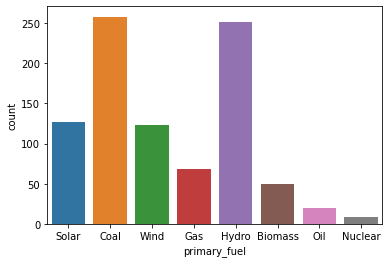

In [16]:
sns.countplot(x='primary_fuel',data=data)
plt.show()

 - We can see, In power plant coal has highly used primary fuel followed by hydro.
 - Nuclear is in lowest number where very low power plant are used nuclear as primary fuel.

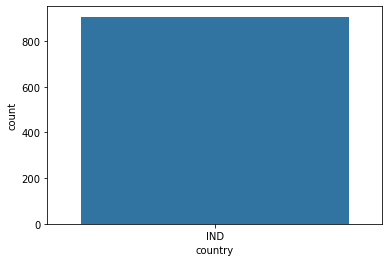

In [17]:
sns.countplot(x='country',data=data)
plt.show()

 - We can see, this data is belong to perticulary India that's, why it has only one Name i.e. India.

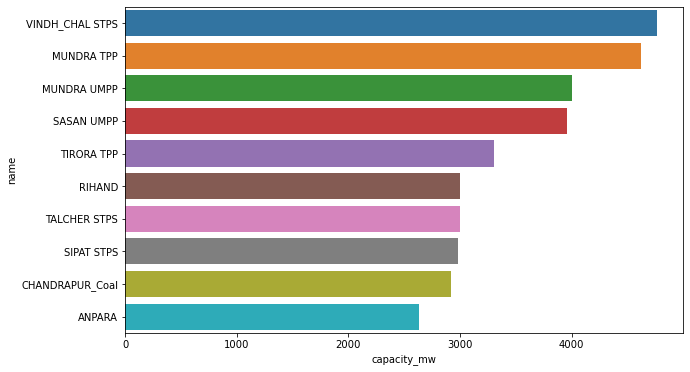

In [18]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="capacity_mw",ascending=False).iloc[0:10,:]
sns.barplot(y="name",x="capacity_mw",data=df_good)
plt.show()

 - These are the top 10 name whose having highest capacity to produce power.
 - In which VINDH_CHALSTPS is top among the other followed by MUNDRA TPP.

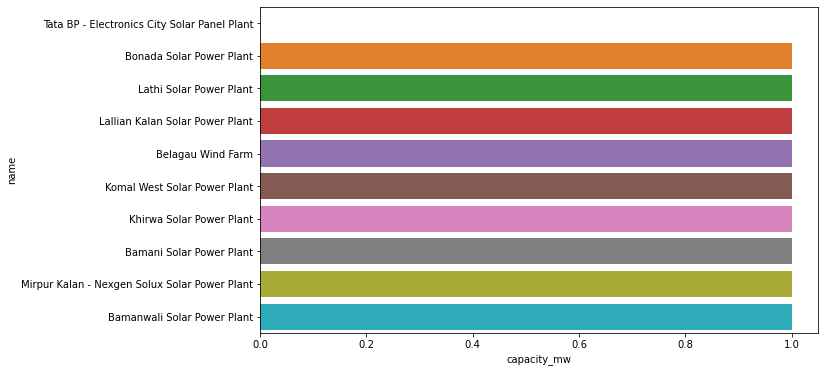

In [19]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="capacity_mw",ascending=True).iloc[0:10,:]
sns.barplot(y="name",x="capacity_mw",data=df_good)
plt.show()

 - These are the bottom 10 name whose have a same capacity_mw.
 - But Tata BP is lowest among the other or i can say, not produce any power.

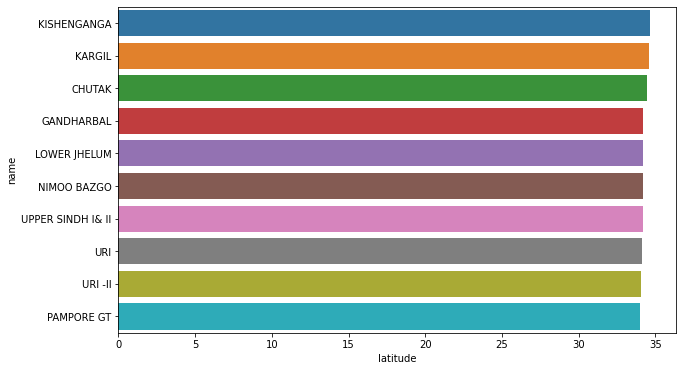

In [20]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="latitude",ascending=False).iloc[0:10,:]
sns.barplot(y="name",x="latitude",data=df_good)
plt.show()

 - We can see, by latitude Kishenganga has highest latitude. It mean at high latitude criteria, it is top.
 - We can see, all top 10 name of place, where they are generaly lies in nearly same latitude.

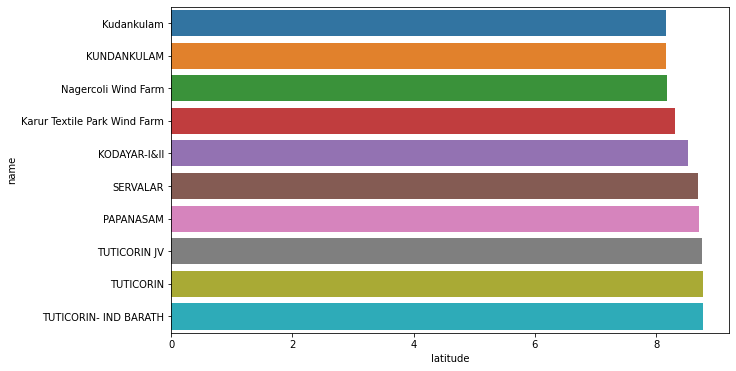

In [21]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="latitude",ascending=True).iloc[0:10,:]
sns.barplot(y="name",x="latitude",data=df_good)
plt.show()

 - These are the bottom 10 name of place where latitude is low.
 - Place where power plant located at low latitude.
 - We can see, all bottom 10 name of place, where they are generaly lies in nearly same latitude.

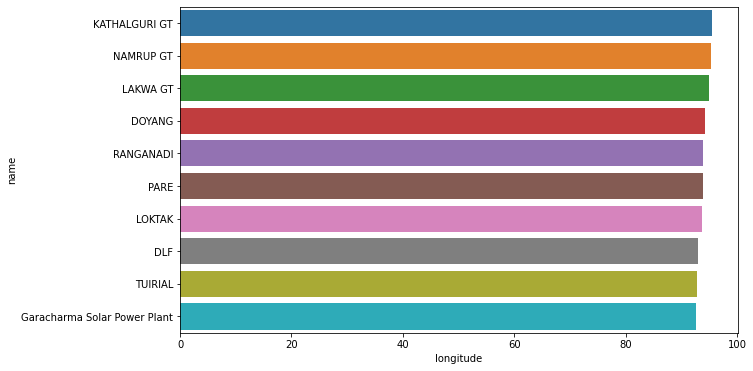

In [22]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="longitude",ascending=False).iloc[0:10,:]
sns.barplot(y="name",x="longitude",data=df_good)
plt.show()

- We can see, by latitude Kathalguri has highest longitude. It mean at high longitude criteria, it is top.
- We can see, all top 10 name of place, where they are generaly lies in nearly same longitude.

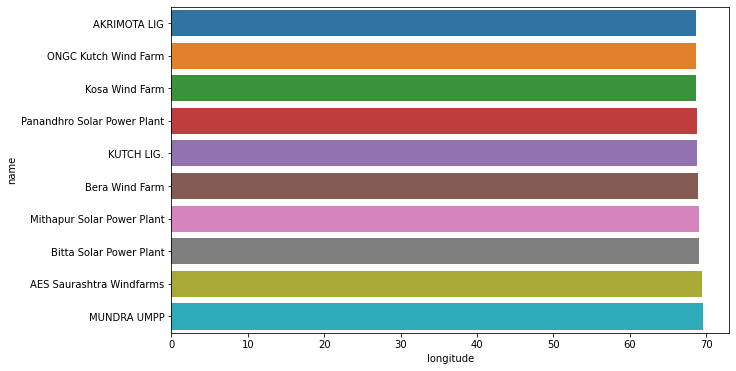

In [23]:
plt.figure(figsize=(10,6))
df_good = data.sort_values(by="longitude",ascending=True).iloc[0:10,:]
sns.barplot(y="name",x="longitude",data=df_good)
plt.show()

- These are the bottom 10 name of place according to latitude.
- Akrimota LIG is place at bottom according to longitude
- Place where power plant located at low longitude.
- We can see, all bottom 10 name of place, where they are generaly lies in nearly same longitude.

###  Find the name of the power plant whose used a primary_fuel as solar

In [24]:
# Find the name that has a primary_fuel as solar
df = data[data['primary_fuel']=='Solar'].groupby(['capacity_mw','name']).size().reset_index()

In [25]:
df.tail()

,capacity_mw,name,0
122,100.0,Pokhran THE Solar Power Plant,1
123,100.0,Sakri 1A Solar Power Plant,1
124,125.0,Dhursar,1
125,221.0,Charanka Solar Power Plant,1
126,648.0,Kamuthi Solar Power Plant,1


In [26]:
ddf = df.tail(10)

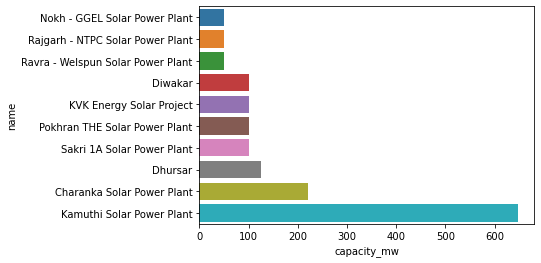

In [27]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - We can see, these are top 10 name of power plant whose primary fuel is lower.
 - Kamuthi soalr power plant has a highest capacity_mw to generate the solar electricity.

In [28]:
dff= df.head(10)

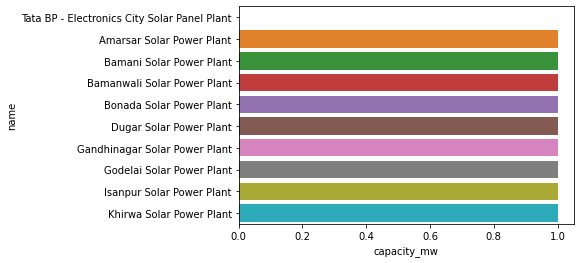

In [29]:
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

- We can see, Bottom 10 name of power plant whose used primary_fuel as solar.
- Tata BP is lowest amont the other.

### Find the name of the power plant whose used a primary_fuel as Coal

In [30]:
# Find the name that has a primary_fuel as coal
df = data[data['primary_fuel']=='Coal'].groupby(['capacity_mw','name']).size().reset_index()

In [31]:
ddf = df.tail(10)

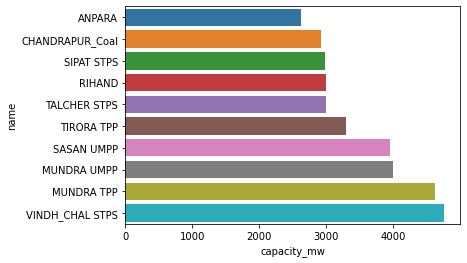

In [32]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - We can see,Vindh_chal has top in name whose used coal as primary_fuel.
 - Anpara at 10 position whose used coal as primary fuel.
 - Upto 2600 all top 10 power plant has a capacity equally distribution.

In [33]:
dff = df.head(10)

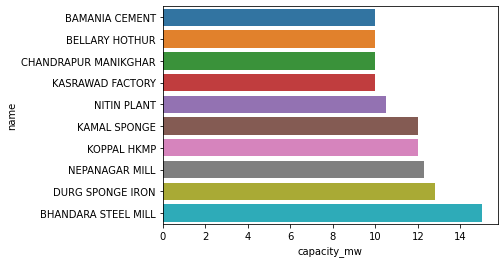

In [34]:
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

 - We can see, bottom 10 plant name whose used coal as primary fuel.
 - In which Bamania cement has in lowest postion.
 - Upto 10 capacity_mw, all are used coal equally.

### Find the name of the power plant whose used a primary_fuel as Wind

In [35]:
# Find the name that has a primary_fuel as wind
df = data[data['primary_fuel']=='Wind'].groupby(['capacity_mw','name']).size().reset_index()

In [36]:
ddf = df.tail(10)

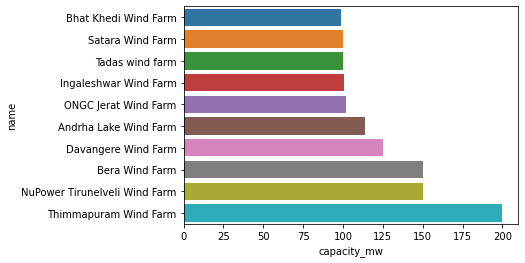

In [37]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - These are top 10 plant name whose used primary fuel as wind.
 - Thimmapuram wind farm is in top whose produce 190 mw of capacity.

In [38]:
dff = df.head(10)

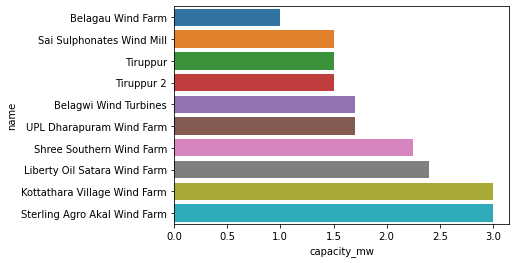

In [39]:
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

- These are bottom 10 power plant name, In which Belagau wind farm is in lowest postiton whose produce 1.0 capacity_mw power.


### Find the name of the power plant whose used a primary_fuel as Gas

In [40]:
# Find the name that has a primary_fuel as Gas
df = data[data['primary_fuel']=='Gas'].groupby(['capacity_mw','name']).size().reset_index()

In [41]:
ddf = df.tail(10)

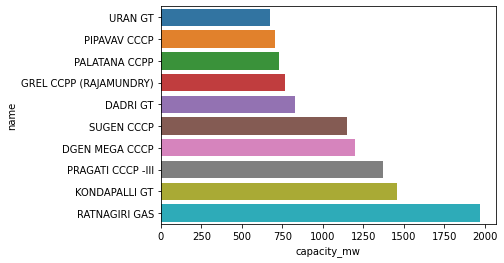

In [42]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - These are top 10 pant name whose used Gas as primary fuel.
 - In which Ratnagiri Gas top amont the other whose used gas as primary fuel.
 - About 610 mw all are equally distributed.

In [43]:
dff = df.head(10)

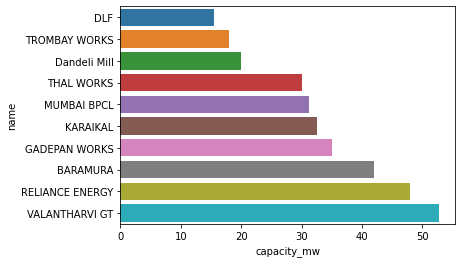

In [44]:
# Bottom 10 power plant whose used gas as primary fuel.
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

 - DLF is at lowest position. In which they less used gas as primary fuel.
 - Vlantharvi GT is at in 10th position. In which they have generating capacity more 50 mw.

### Find the name of the power plant whose used a primary_fuel as Hydro

In [45]:

df = data[data['primary_fuel']=='Hydro'].groupby(['capacity_mw','name']).size().reset_index()

In [46]:
ddf = df.tail(10)

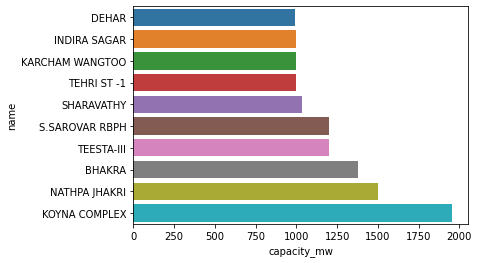

In [47]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

- These are name of top 10 plant whose used Primary fues as Hydro.
- I think these are all the `Dam` name.
- In this Koyna Complex has highest capacity followed by Nathpa Jhakri.

In [48]:
dff = df.head(10)

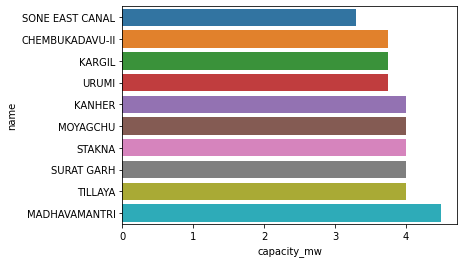

In [49]:
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

- These are bottom 10 plant name. In which Sone East Canal at bottom position.
- All are produce more than 3.2 mw electricity.

### Find the name of the power plant whose used a primary_fuel as Oil

In [50]:
df = data[data['primary_fuel']=='Oil'].groupby(['capacity_mw','name']).size().reset_index()

In [51]:
ddf = df.tail(10)

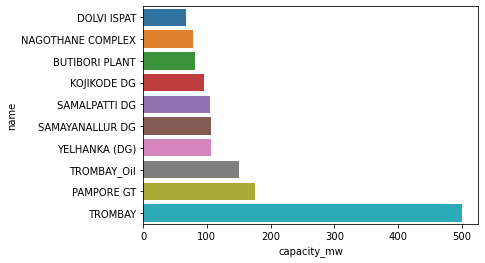

In [52]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - We can see, ThromBay has Highest capacity to generate 490 mw of electricity by using Oil as primary fuel.
 - There are huge difference between top 2 plant in their capacity to generate electricity.
 - These are the top plant name whose used oil as primary fuel.

In [53]:
dff = df.head(10)

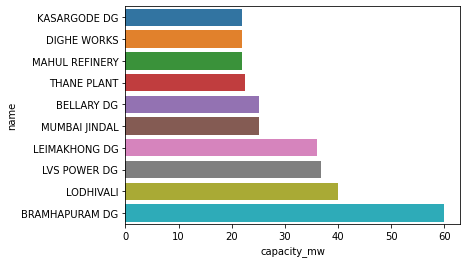

In [54]:
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

- These are bottom 10 plant name whose used oil as primary fuel.
- Kasaregode DG is in lowest position where they have a capacity to generate electricity upto 25 mw.

### Find the name of the power plant whose used a primary_fuel as Biomass

In [55]:
df = data[data['primary_fuel']=='Biomass'].groupby(['capacity_mw','name']).size().reset_index()

In [56]:
ddf = df.tail(10)

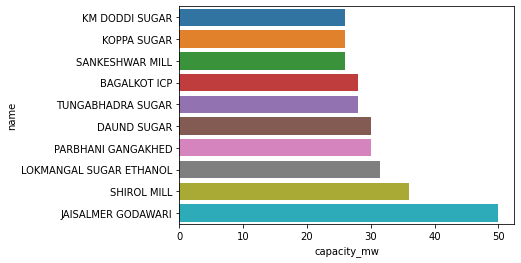

In [57]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - Jaisalmer Godawari is in top position among the other. It has a capacity to generate upto 50mw electricity.
 - Rest of the all have a capacity to generate upto 27 mw of electricity.

In [58]:
dff = df.head(10)

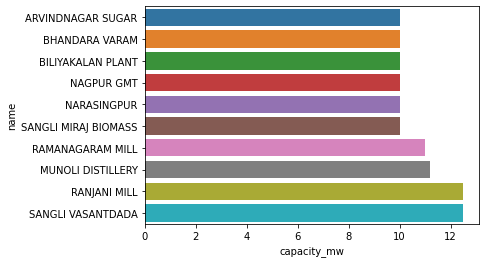

In [59]:
sns.barplot(y="name",x="capacity_mw",data=dff)
plt.show()

- Arvindnagar Sugar is in Bottom position.
- All have a capacity to generate upto 10 mw electricity.

### Find the name of the power plant whose used a primary_fuel as Nuclear

In [60]:
df = data[data['primary_fuel']=='Nuclear'].groupby(['capacity_mw','name']).size().reset_index()

In [61]:
ddf = df.tail(10)

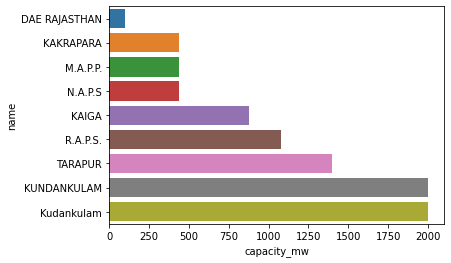

In [62]:
sns.barplot(y="name",x="capacity_mw",data=ddf)
plt.show()

 - These are the top 10 plant name whose used Nuclear as primary fuel.
 - In which Kudankulam is in top whose have a capacity to generate upto 2000 mw electricity.
 - In which DAE Rajasthan is in bottom whose have a capacity to generate upto 100 mw electricity.

In [63]:
data['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

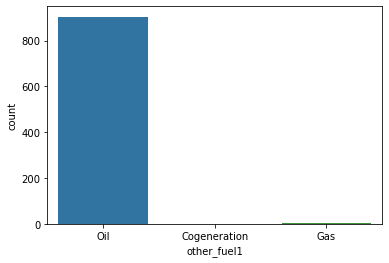

In [64]:
sns.countplot(x='other_fuel1',data=data)
plt.show()

 - In other fuel1 , Oil is using alots then other.
 - Cogeneration fuel is used in only one plant.

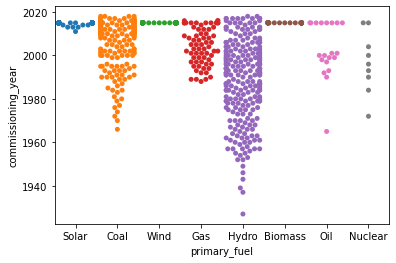

In [65]:
sns.swarmplot(x='primary_fuel',y='commissioning_year',data=data)
plt.show()

 - We can see, Hydro as primary fuel is having maximum commissioning year followed by coal.
 - Solar is in bottom postion where commissioning year is less.
 - From above we can interpreting that, from 1950 india is having more focus on renewable energy.

In [66]:
 a = data['owner'].value_counts().iloc[0:10]

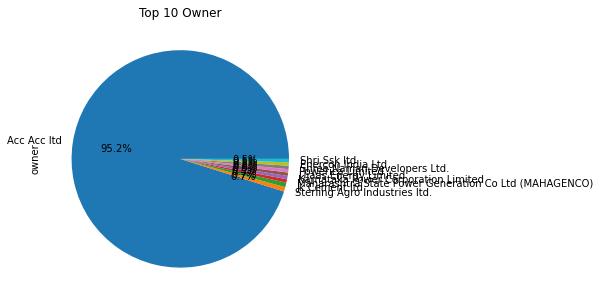

In [67]:
plt.figure(figsize=(5,5))
a.plot.pie(autopct = '%1.1f%%')
plt.title('Top 10 Owner')
plt.show()

- We can see, ACC ltd has 95% ownership among the other. It means that, ACC ltd is holding maximum plant. i.e. 95% plant are belong to ACC ltd.
- remaining is having less than 0.7% owenership.

In [68]:
a = data['source'].value_counts().iloc[0:5]

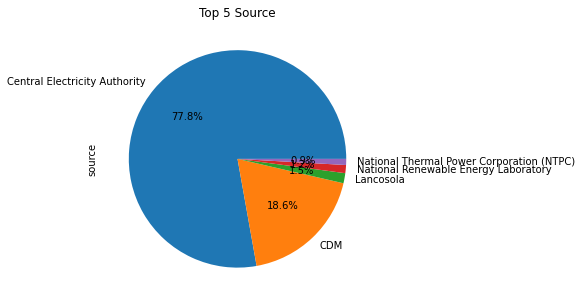

In [69]:
plt.figure(figsize=(5,5))
a.plot.pie(autopct = '%1.1f%%')
plt.title('Top 5 Source')
plt.show()

- These are the top 5 source of the plant.
- In which Central Electricity Authority is having highest source.

In [70]:
a = data['geolocation_source'].value_counts()

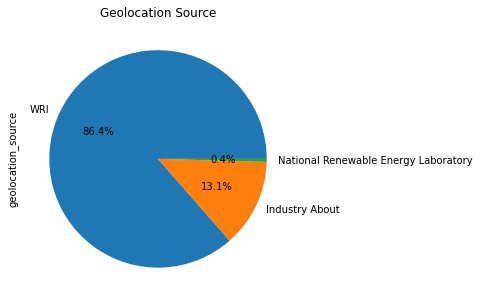

In [71]:
plt.figure(figsize=(5,5))
a.plot.pie(autopct = '%1.1f%%')
plt.title('Geolocation Source')
plt.show()

 - These are the geolocation source in which WRI is having 86.4% followed by Industry About.

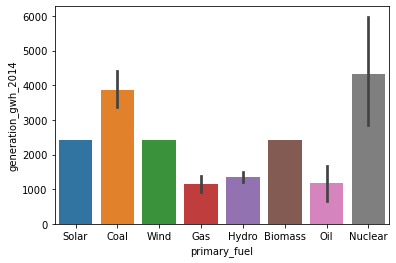

In [72]:
sns.barplot(x='primary_fuel',y='generation_gwh_2014',data=data)
plt.show()

- We can see, Nuclear has highest generation gwh in year 2014 followed by Coal.
- Gas has lowest generation gwh in 2014.

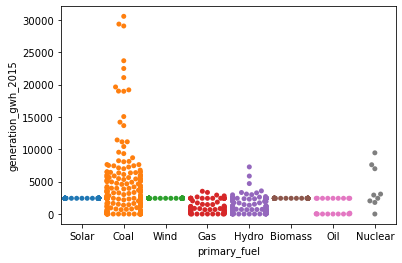

In [73]:
sns.swarmplot(y='generation_gwh_2015',data=data,x='primary_fuel')
plt.show()

- We can see, Coal has highest generation gwh in year 2015 followed by Hydro.
- Wind has lowest generation gwh in 2015.

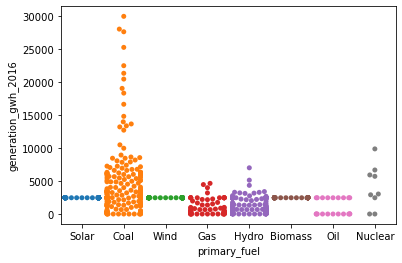

In [74]:
sns.swarmplot(y='generation_gwh_2016',data=data,x='primary_fuel')
plt.show()

- We can see, Coal has highest generation gwh in year 2016 followed by Hydro.
- Wind has lowest generation gwh in 2016.

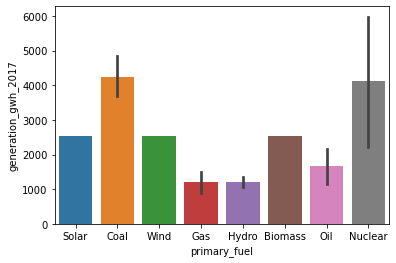

In [75]:
sns.barplot(x='primary_fuel',y='generation_gwh_2017',data=data)
plt.show()

- We can see, Nuclear has highest generation gwh in year 2017 followed by Coal.
- Gas has lowest generation gwh in 2017.

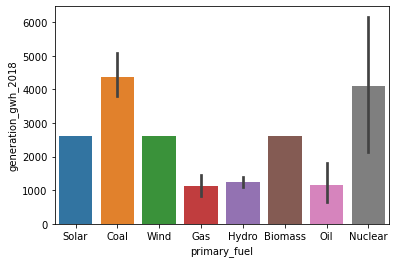

In [76]:
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=data)
plt.show()

 - From 2014 we followed same pattern where no changes is occured.

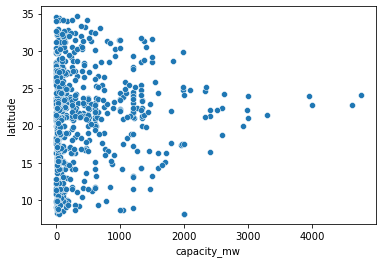

In [77]:
sns.scatterplot(x='capacity_mw',y='latitude',data=data)
plt.show()

- We can see, maximum latitude is lies in upto 1000 mw.
- But after the 1000 mw latitude is having little linear relationship with capacity_mw.

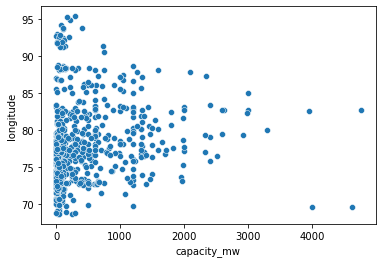

In [78]:
sns.scatterplot(x='capacity_mw',y='longitude',data=data)
plt.show()

- We can see, maximum longitude is lies in upto 1000 mw.
- But after the 1000 mw longitude is having little linear relationship with capacity_mw.

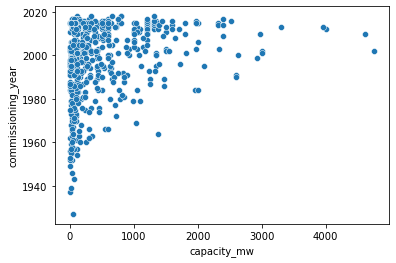

In [79]:
sns.scatterplot(x='capacity_mw',y='commissioning_year',data=data)
plt.show()

- There is no such relationship between each other.
- From 1990 maximim commissioning is happend.

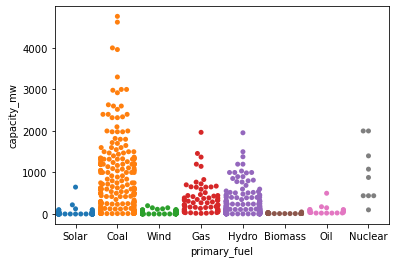

In [80]:
sns.swarmplot(x='primary_fuel',y='capacity_mw',data=data)
plt.show()

- Coal has maximum capacity_mw followed by Hydro.
- Biomass has minimum capacity_mw.

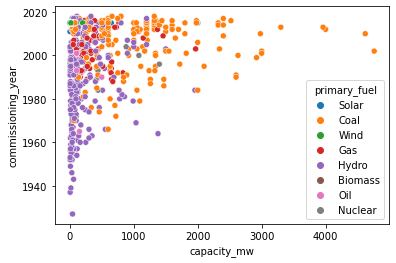

In [81]:
sns.scatterplot(x='capacity_mw',y='commissioning_year',data=data,hue='primary_fuel')
plt.show()

 - We can see, Coal power plant are maximum commissioning followed by Hydro.
 - Biogass has minimum commissioning.

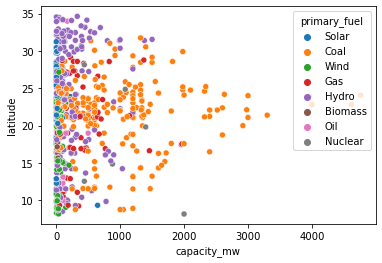

In [82]:
sns.scatterplot(x='capacity_mw',y='latitude',data=data,hue='primary_fuel')
plt.show()

- We can see, the coal based power plant are maximum lies in 20 to 30 latitude.

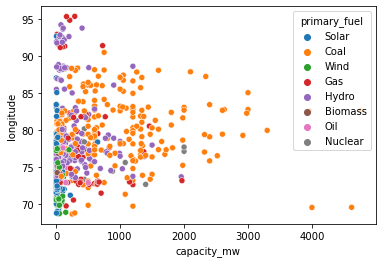

In [83]:
sns.scatterplot(x='capacity_mw',y='longitude',data=data,hue='primary_fuel')
plt.show()

- We can see, the coal based plant maximum lies in 75 to 90 longitude.

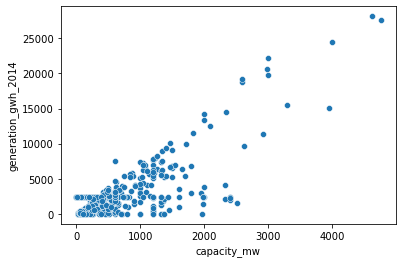

In [84]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=data)
plt.show()

- We can see, generation gwh is increasing as increasing the capacity_mw in 2015.
- It show linear relation ship.
- As we can notice here, in 2015 the capacity of power plant is maximum upto 2000 mw.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

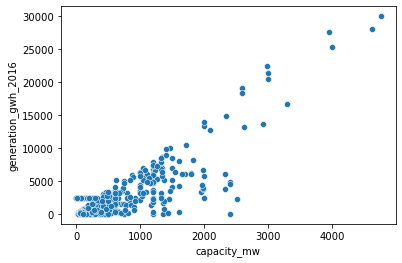

In [85]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=data)

- In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016.

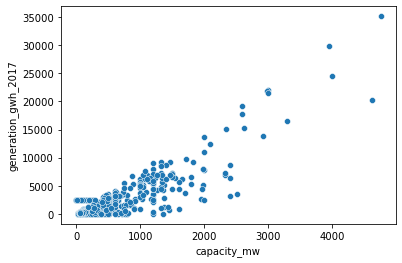

In [86]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=data)
plt.show()

 - We can observered here, Year by year capacity of plant is increasing.
 - This same patten in 2015,2016 and 2017 also.

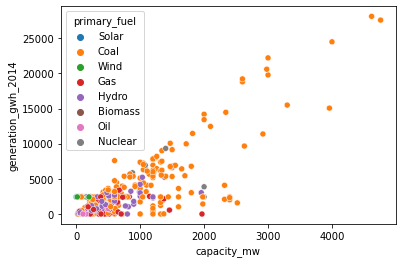

In [87]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=data, hue='primary_fuel')
plt.show()

- We see, Particularly Coal based power plant has increasing in thire capacity in 2014.
- Hydo based primary fuel also incresing their capacity.

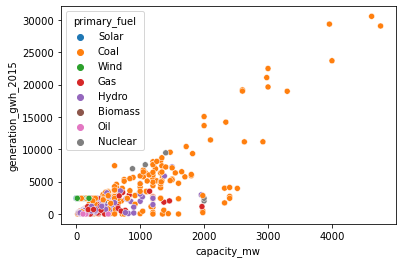

In [88]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=data, hue='primary_fuel')
plt.show()

- In 2015 also coal basedpower plant has increasing thire capacity.
- Biomass as in lowest position.

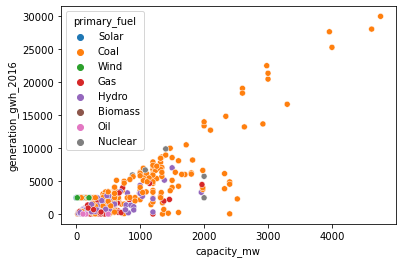

In [89]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=data, hue='primary_fuel')
plt.show()

- In 2016 also coal basedpower plant has increasing thire capacity.
- Biomass as in lowest position.

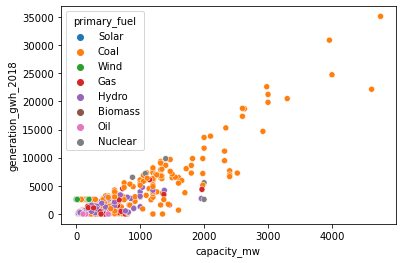

In [90]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=data, hue='primary_fuel')
plt.show()

- In 2018 also coal based power plant has increased thier capacity followed by Hydro.
- Biogass is least performing among the all primary fuel becouse it does not show any growth in capacity.

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

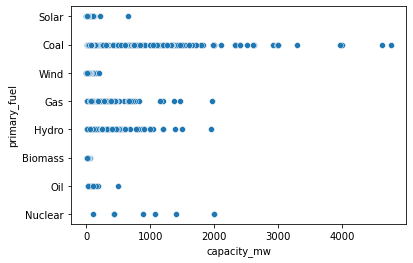

In [91]:
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=data)

- We can see, Coal has maximum capacity to generating power followed Hydro.
- Biogass has lowest in number. there is less power plant are used biogass as primary fuel.

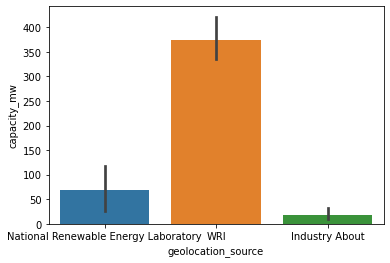

In [92]:
sns.barplot(x='geolocation_source',y='capacity_mw',data=data)
plt.show()

- We can see, from WRI is main source of all data collecting becouse it has highest in among with respect to capacity_mw.

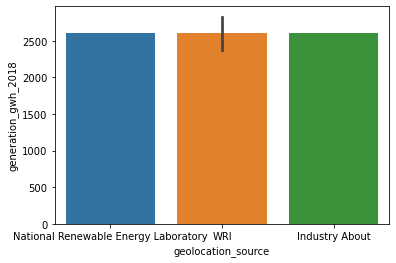

In [93]:
sns.barplot(x='geolocation_source',y='generation_gwh_2018',data=data)
plt.show()

- In 2018 maximum geolocation source taken from WRI.

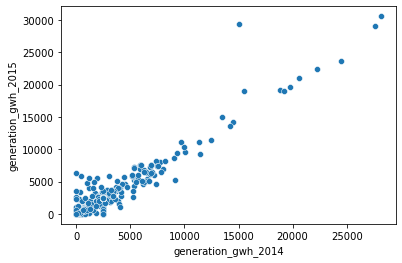

In [16]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2015',data=data)
plt.show()

 - We can see,generation_gwh_2014 has linear relationship with generation_gwh_2015.
 - generation_gwh_2014 increses then generation_gwh_2015 also increases.

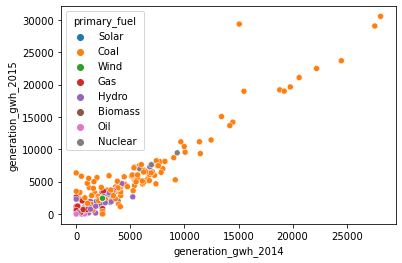

In [17]:
sns.scatterplot(x='generation_gwh_2014',y='generation_gwh_2015',data=data,hue='primary_fuel')
plt.show()

 - We can see, coal capacity to generation is increasing followed by Hydro.

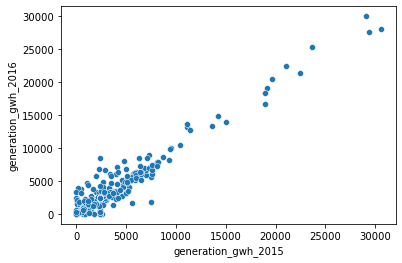

In [18]:
sns.scatterplot(x='generation_gwh_2015',y='generation_gwh_2016',data=data)
plt.show()

- We can see, both features is having linear relationship with each other.
- Upto 10000 gwh maximum plant is having generating capacity. 

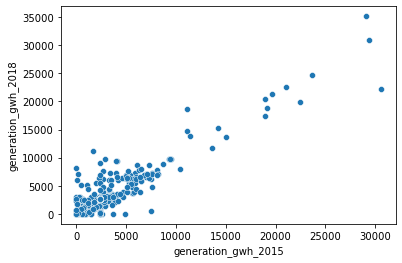

In [19]:
sns.scatterplot(x='generation_gwh_2015',y='generation_gwh_2018',data=data)
plt.show()

- We can see, both features is having linear relationship with each other.
- Upto 10000 gwh maximum plant is having generating capacity.

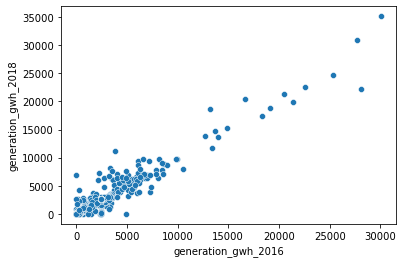

In [20]:
sns.scatterplot(x='generation_gwh_2016',y='generation_gwh_2018',data=data)
plt.show()

- We can see, both features is having linear relationship with each other.
- Upto 10000 gwh maximum plant is having generating capacity.
- From above observation we can see, that generation_gwh -2014,2015,2016,2017,2018 are highly correlated to each others.

## 4.  Encoding of DataFrame

In [94]:
data.drop(columns=['country','country_long','gppd_idnr','url','year_of_capacity_data','generation_data_source','source','owner','name'],axis=1,inplace=True)

In [95]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,Coal,Oil,2015.0,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,Wind,Oil,2015.0,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [96]:
data.shape

(907, 12)

### Label Encoding

In [97]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
 
data['primary_fuel']= label_encoder.fit_transform(data['primary_fuel'])
data['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [98]:
data['other_fuel1']= label_encoder.fit_transform(data['other_fuel1'])
data['other_fuel1'].unique()

array([2, 0, 1])

In [99]:
data['geolocation_source']= label_encoder.fit_transform(data['geolocation_source'])
data['geolocation_source'].unique()

array([1, 2, 0])

In [100]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2,2011.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,24.7663,74.6090,1,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,21.9038,69.3732,7,2,2015.0,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


## 5. Describe the Dataset

In [101]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,1.995590,2004.594267,1.733186,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.812291,2.280652,0.081259,15.734928,0.677151,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,2.000000,1998.000000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340
50%,59.200000,21.281800,76.979200,3.000000,2.000000,2014.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,385.250000,25.176450,79.206100,6.000000,2.000000,2015.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,4760.000000,34.649000,95.408000,7.000000,2.000000,2018.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


#### Outcome of describe of datasets:

 - Difference between 75% and max in capacity_mw, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 is high, columns is considerable indicating presence of outliers.
 - Capacity_mw Mean to Standrad of deviation difference is close.

## Correlation of the features with target column 

In [102]:
data.corr()['capacity_mw'].sort_values()

primary_fuel          -0.380395
commissioning_year    -0.004072
other_fuel1            0.003105
latitude               0.050984
longitude              0.195882
geolocation_source     0.204865
generation_gwh_2014    0.694350
generation_gwh_2015    0.711190
generation_gwh_2016    0.742221
generation_gwh_2017    0.757585
generation_gwh_2018    0.773456
capacity_mw            1.000000
Name: capacity_mw, dtype: float64

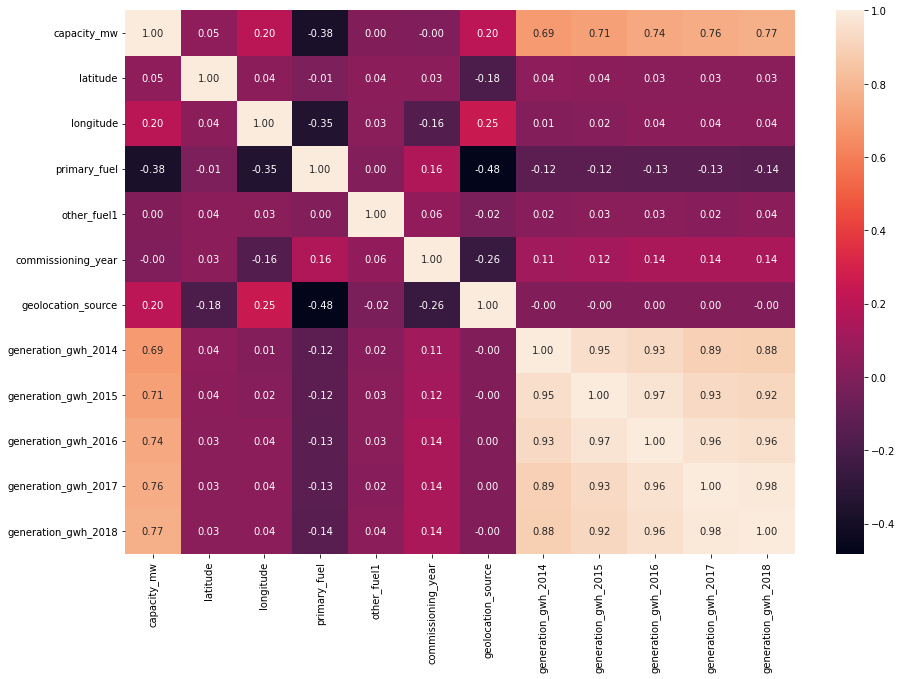

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, fmt ='.2f')
plt.show()

### Outcome of Correlation

 1. generation_gwh_2014 has 69% positive correlation with target column.
 2. generation_gwh_2015 has 71% positive correlation with target column.
 3. generation_gwh_2016 has 74% positve correlation with target column.
 4. generation_gwh_2017 has 76% positve correlation with target column.
 5. generation_gwh_2018 has 77% positve correlation with target column.

#### Feature correlation with each others

 1. primary_fuel has 48% negative correlation with geolocation_source.
 2. generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 are highly correlated to each others.

## Visualizing correlation of feature columns with label column

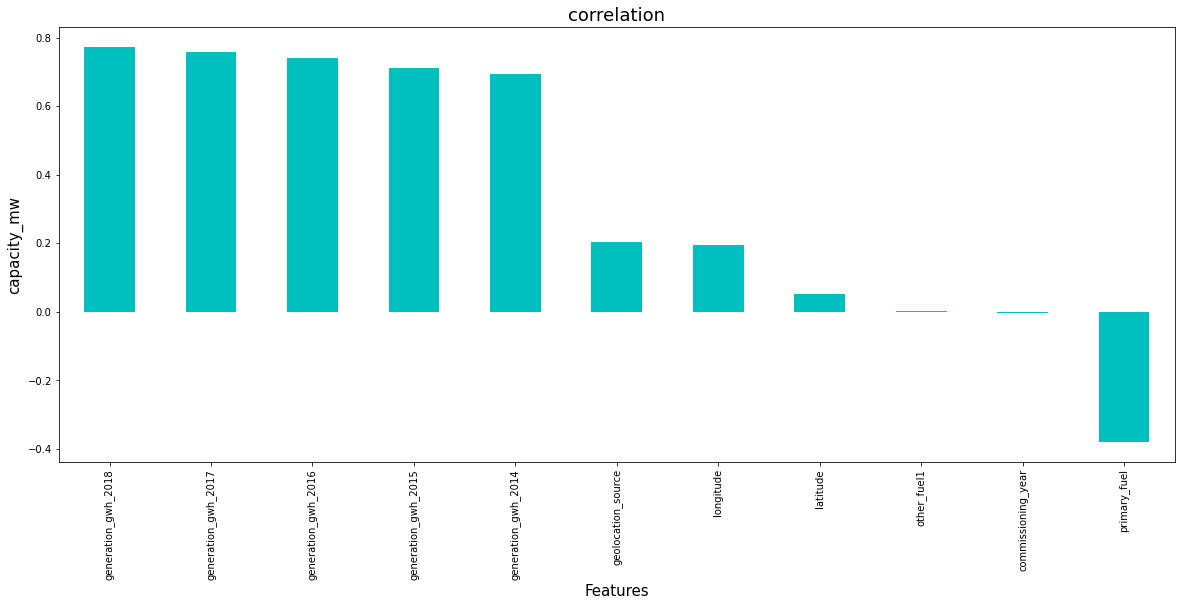

In [104]:
plt.figure(figsize = (20,8))
data.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

- It is observed thatgeneration_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 are highly correlated to capacity_mw.
- primary_fuel has the highest negative correlation with Attrition.

## Checking Distribution of data

In [105]:
data.shape

(907, 12)

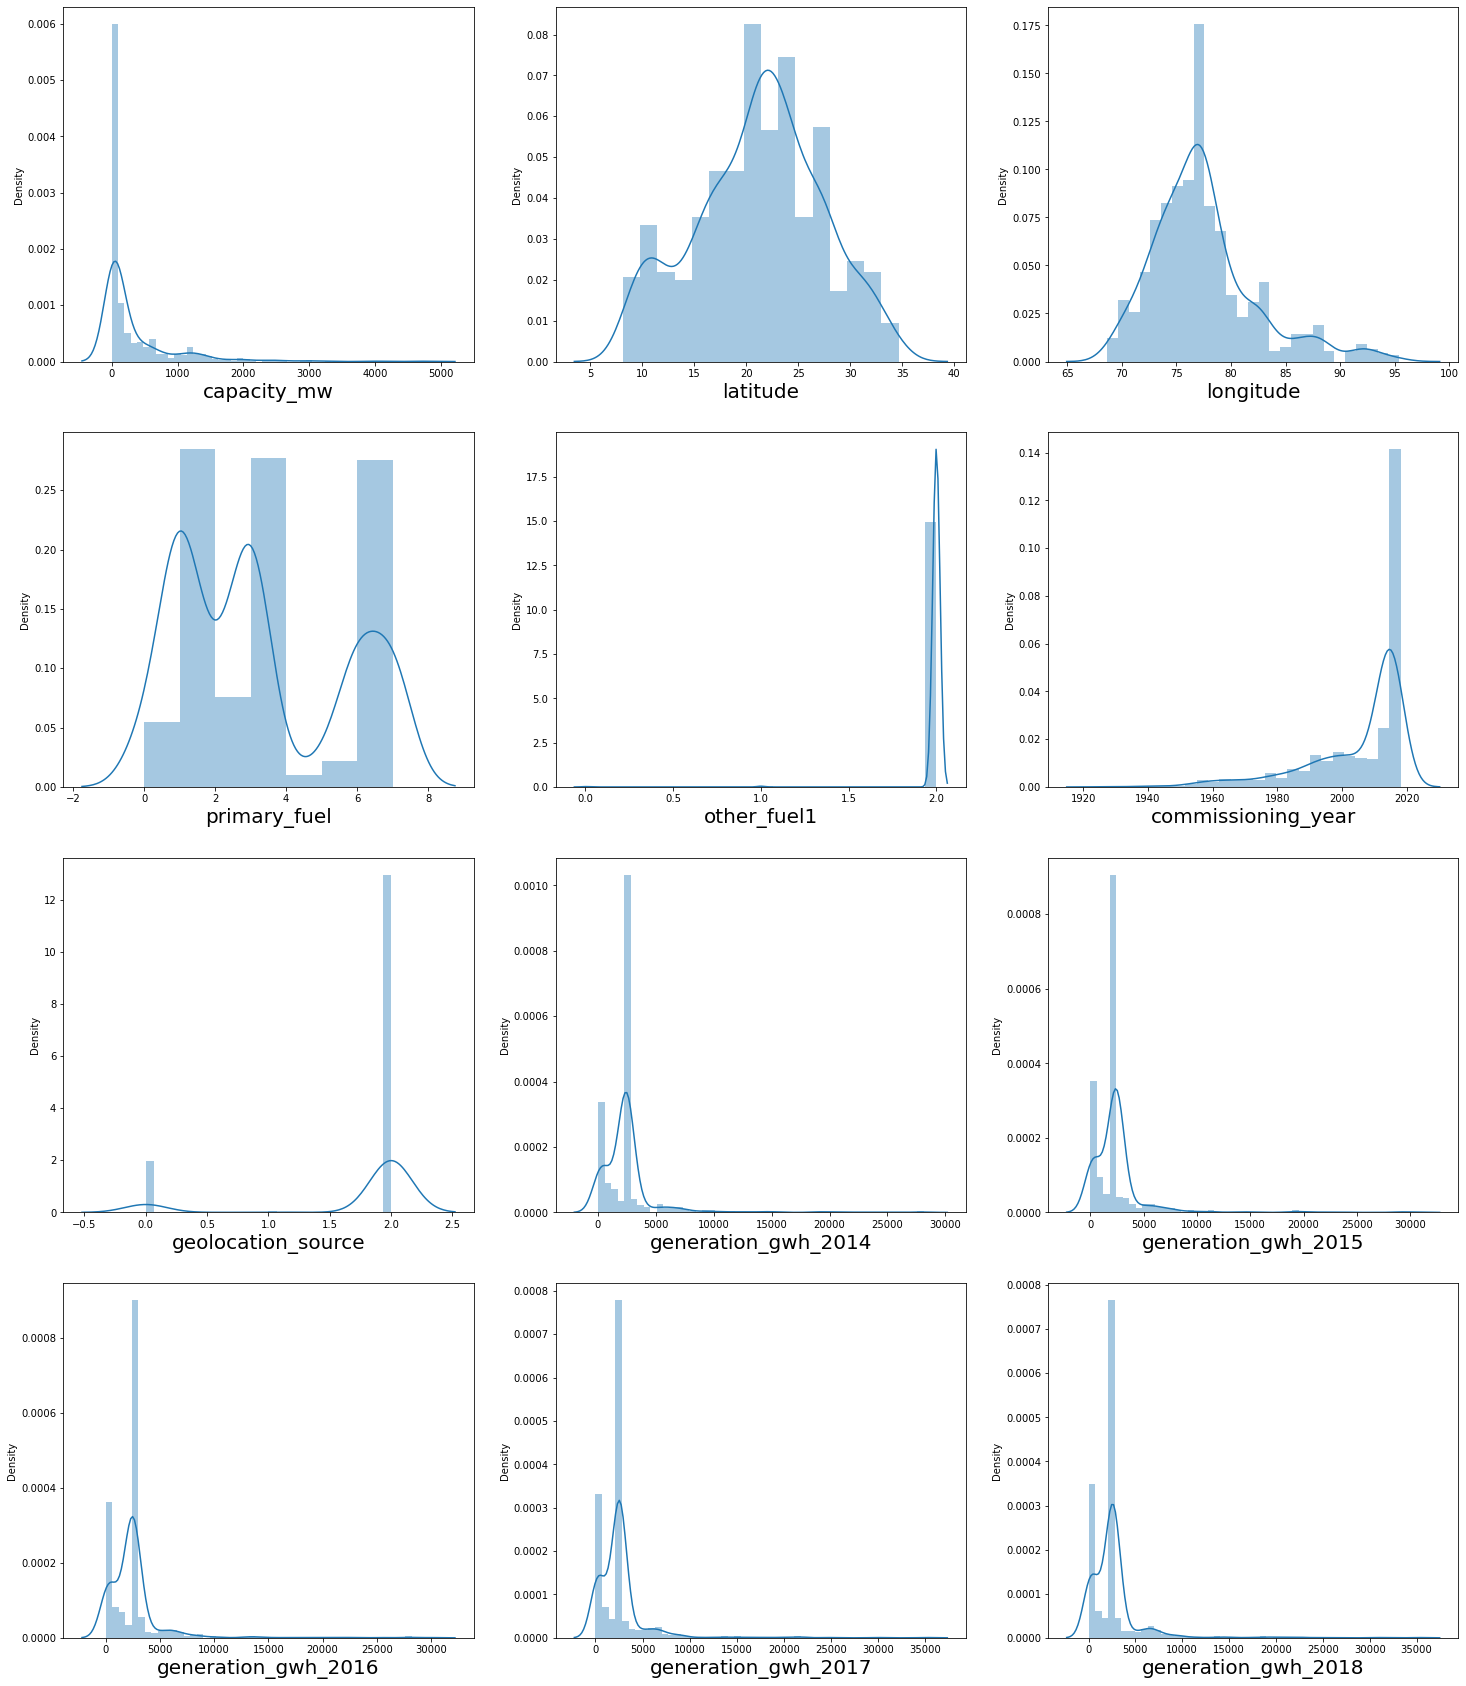

In [106]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- generation_gwh_2014, generation_gwh_2015, generation_gwh_2016,   generation_gwh_2017 and generation_gwh_2018,  these feature are positively skewed.
- other_fuel1 and commissioning_year are Negative skewed. 

In [107]:
data.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.714873
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

- Outcome of the skewness: Skewness threshold is taken is +/-0.65.
- Almost all continuous data are having skewness.

## Checking Outliers

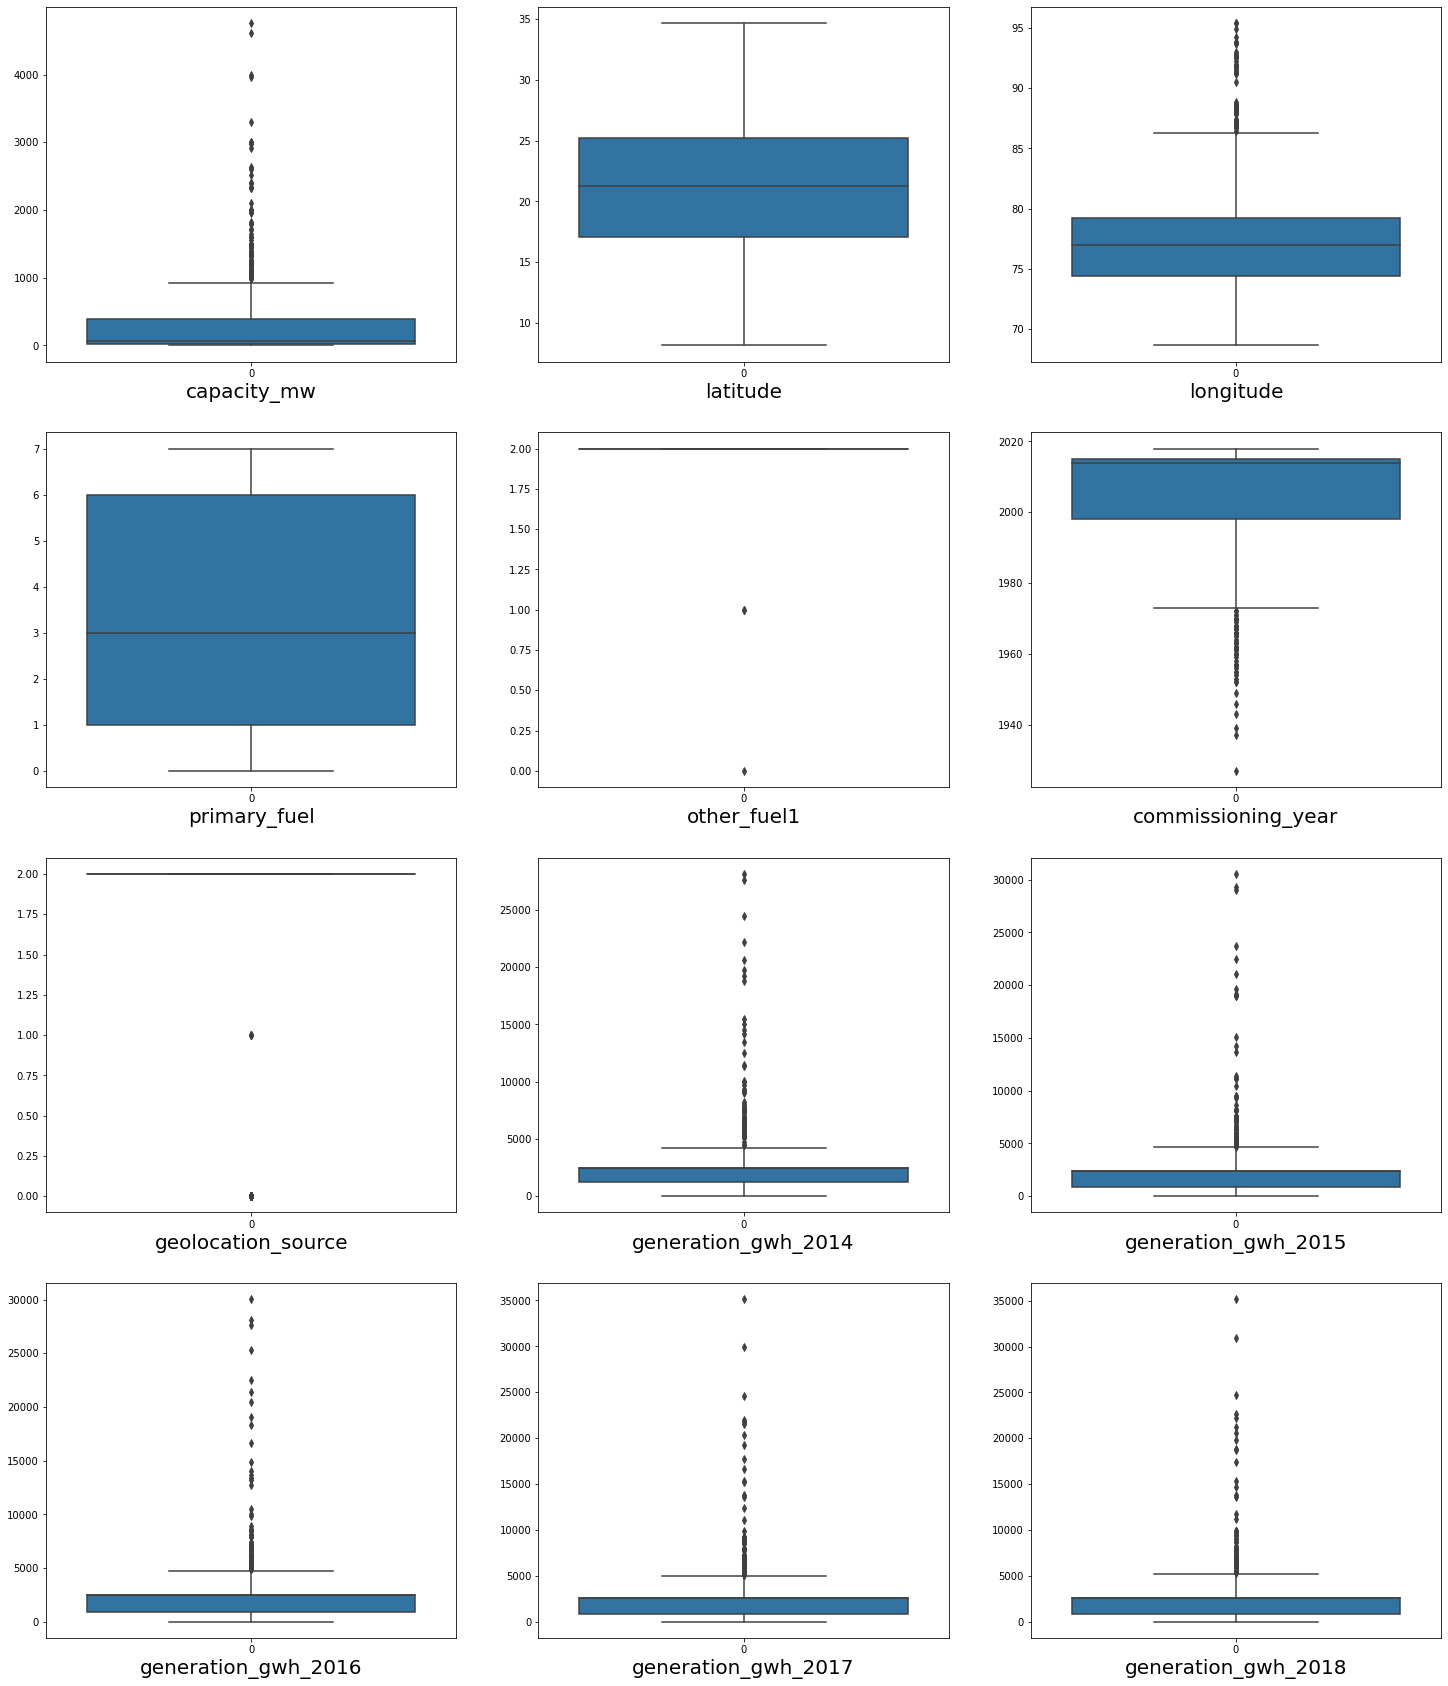

In [108]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in data:
    if plotnumber <=12:
        plt.subplot(4,3,plotnumber)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

- generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018, these feature are having outliers.
- capacity_mw is also having outliers.

### Removing Outliers

In [109]:
from scipy.stats import zscore

z_score = zscore(data)
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtering_entry = (abs_z_score  < 3).all(axis=1)

df = data[filtering_entry]


In [110]:
df.shape

(847, 12)

In [111]:
data.shape

(907, 12)

### Percentage of data loss

In [112]:
data_loss = ((907 - 847)/907*100)
print(data_loss,'%')

6.615214994487322 %


#### Data skewness before removing

In [113]:
data.skew()

capacity_mw             3.123576
latitude               -0.149698
longitude               1.141881
primary_fuel            0.472251
other_fuel1           -20.453120
commissioning_year     -1.714873
geolocation_source     -2.159841
generation_gwh_2014     5.035446
generation_gwh_2015     5.364134
generation_gwh_2016     5.068427
generation_gwh_2017     5.110952
generation_gwh_2018     4.937907
dtype: float64

#### Data skewness after removing

In [114]:
df.skew()

capacity_mw            1.980298
latitude              -0.114249
longitude              0.919257
primary_fuel           0.412051
other_fuel1            0.000000
commissioning_year    -1.541894
geolocation_source    -2.058664
generation_gwh_2014    1.525811
generation_gwh_2015    1.392033
generation_gwh_2016    1.414064
generation_gwh_2017    1.277563
generation_gwh_2018    1.315920
dtype: float64

# 6. Building Model for predicting capacity_mw (Regression model)

## 6.1 Checking Multicollinearity

In [115]:
x = df.drop(columns=['capacity_mw'],axis=1)
y = df['capacity_mw']

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = pd.DataFrame()

In [120]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,latitude,1.059297
1,longitude,1.198753
2,primary_fuel,1.460965
3,other_fuel1,NaN
4,commissioning_year,1.171380
5,geolocation_source,1.446399
6,generation_gwh_2014,4.984711
7,generation_gwh_2015,10.015792
8,generation_gwh_2016,12.168015
9,generation_gwh_2017,14.547300


 - If VIF > 10, It means multicollinearity is present.
 - MultiCollinearity exists in generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 Based on ANOVA F scores.
 - Those features is having lowest correlation with target column that feature will be dropped.

In [121]:
df.drop(["generation_gwh_2015","generation_gwh_2016", "generation_gwh_2017",'generation_gwh_2018'], axis=1, inplace=True)

In [122]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014
0,2.5,28.1839,73.2407,6,2,2011.0,1,2431.823590
1,98.0,24.7663,74.6090,1,2,2015.0,2,2431.823590
2,39.2,21.9038,69.3732,7,2,2015.0,2,2431.823590
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000


In [123]:
x = df.drop(columns=['capacity_mw'],axis=1)
y = df['capacity_mw']

In [124]:
x.head()

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014
0,28.1839,73.2407,6,2,2011.0,1,2431.823590
1,24.7663,74.6090,1,2,2015.0,2,2431.823590
2,21.9038,69.3732,7,2,2015.0,2,2431.823590
3,23.8712,91.3602,2,2,2004.0,2,617.789264
4,21.9603,82.4091,1,2,2015.0,2,3035.550000


In [125]:
y.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [126]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [127]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.16207798, -0.93060155,  1.13240513, ...,  0.30574897,
        -2.231622  ,  0.32562904],
       [ 0.59366047, -0.51212062, -1.00127109, ...,  0.71697492,
         0.41017196,  0.32562904],
       [ 0.12147159, -2.36385754,  1.40510303, ...,  0.71697492,
         0.41017196,  0.32562904],
       ...,
       [-0.95559329, -0.23832477,  1.40510303, ...,  0.71697492,
         0.41017196,  0.32562904],
       [ 0.5247575 , -0.77079362, -1.00127109, ...,  0.71697492,
         0.41017196,  0.32562904],
       [-1.80227579,  0.24559582,  1.40510303, ...,  0.71697492,
         0.41017196,  0.32562904]])

## Model Building

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## 6.2  Linear Regression

### Finding Random State

In [129]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.40411224824391834 on Random State 427


In [130]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=427)

In [131]:
regressors = {
    'Linear Regression' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [132]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,234.701,116973.4,342.013743,0.404


### Cross - Validation of the model

In [133]:
y_pred = lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [134]:
for j in range(4,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 24.211185364603082
accuracy_score is:- 44.00973698503301


At cv:- 5
Cross validation score is:- 25.014811797201673
accuracy_score is:- 44.00973698503301


At cv:- 6
Cross validation score is:- 23.723699392208797
accuracy_score is:- 44.00973698503301


At cv:- 7
Cross validation score is:- 22.327502285541062
accuracy_score is:- 44.00973698503301


At cv:- 8
Cross validation score is:- 23.683409157847805
accuracy_score is:- 44.00973698503301


At cv:- 9
Cross validation score is:- 22.680744545927254
accuracy_score is:- 44.00973698503301




In [135]:
lsscore_selected = cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.25014811797201675 
The accuracy score is:  0.4400973698503301


## 6.3 Random Forest Regressor

### Finding Random State

In [136]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8403930842540284 on Random State 678


In [137]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=678)

In [138]:
regressors = {
    
    'Random Forest' : RandomForestRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [139]:
results

,MAE,MSE,RMSE,R2-score
Random Forest,98.196,29821.124,172.687939,0.841


### Cross - Validation of the model

In [140]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [141]:
for j in range(4,10):
    isscore = cross_val_score(rf,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 66.57306703032492
accuracy_score is:- 83.91975153789546


At cv:- 5
Cross validation score is:- 66.88000302371437
accuracy_score is:- 83.91975153789546


At cv:- 6
Cross validation score is:- 67.6185499267549
accuracy_score is:- 83.91975153789546


At cv:- 7
Cross validation score is:- 68.16296739513878
accuracy_score is:- 83.91975153789546


At cv:- 8
Cross validation score is:- 68.96722835530771
accuracy_score is:- 83.91975153789546


At cv:- 9
Cross validation score is:- 66.75131174490852
accuracy_score is:- 83.91975153789546




In [142]:
lsscore_selected = cross_val_score(rf,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6919534762051015 
The accuracy score is:  0.8391975153789546


## 6.4 Gradient Boosting Regressor

### finding Best Random state

In [143]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train, y_train)
    pred = gbr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.8375489971973409 on Random State 554


In [144]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=554)

In [145]:
regressors = {
    
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [146]:
results

,MAE,MSE,RMSE,R2-score
Gradient Boost Regressor,105.839,26657.389,163.270906,0.835


### Cross-validation of the model

In [147]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss  = r2_score(y_test,y_pred)

In [148]:
for j in range(4,10):
    isscore = cross_val_score(gbr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 64.05231868935604
accuracy_score is:- 83.65490454011055


At cv:- 5
Cross validation score is:- 64.55111934477908
accuracy_score is:- 83.65490454011055


At cv:- 6
Cross validation score is:- 64.74661569200128
accuracy_score is:- 83.65490454011055


At cv:- 7
Cross validation score is:- 66.02967168001521
accuracy_score is:- 83.65490454011055


At cv:- 8
Cross validation score is:- 65.90752618127796
accuracy_score is:- 83.65490454011055


At cv:- 9
Cross validation score is:- 63.92088170393051
accuracy_score is:- 83.65490454011055




In [149]:
lsscore_selected = cross_val_score(gbr,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6593690915623116 
The accuracy score is:  0.8365490454011055


## 6.5 KNeighbors Regressor

In [150]:
from sklearn.neighbors import KNeighborsRegressor

### Finding Best Random State

In [151]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7066768414607932 on Random State 427


In [152]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=427)

In [153]:
regressors = {
    
    'KNN Regressor': KNeighborsRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [154]:
results

,MAE,MSE,RMSE,R2-score
KNN Regressor,131.679,57579.648,239.957597,0.707


In [155]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [156]:
for j in range(4,10):
    isscore = cross_val_score(knn,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 45.800760396859786
accuracy_score is:- 70.66768414607932


At cv:- 5
Cross validation score is:- 48.841649957047665
accuracy_score is:- 70.66768414607932


At cv:- 6
Cross validation score is:- 49.95780595530984
accuracy_score is:- 70.66768414607932


At cv:- 7
Cross validation score is:- 50.197370133091326
accuracy_score is:- 70.66768414607932


At cv:- 8
Cross validation score is:- 49.57449688700458
accuracy_score is:- 70.66768414607932


At cv:- 9
Cross validation score is:- 50.40312122522339
accuracy_score is:- 70.66768414607932




In [157]:
lsscore_selected = cross_val_score(knn,x,y,cv=9).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.5040312122522339 
The accuracy score is:  0.7066768414607932


## 6.6 XGBRegressor

### Finding Best Random State

In [158]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    xgb = XGBRegressor()
    xgb.fit(X_train, y_train)
    pred = xgb.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.7888922738953054 on Random State 554


In [159]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=554)

In [160]:
regressors = {
    
    'XG Boost Regressor' : XGBRegressor()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [161]:
results

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,103.878,34091.585,184.639066,0.789


### Cross Validation of model

In [162]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [163]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 62.59943594676955
accuracy_score is:- 78.88922738953053


At cv:- 5
Cross validation score is:- 57.5437966821694
accuracy_score is:- 78.88922738953053


At cv:- 6
Cross validation score is:- 61.18512278942331
accuracy_score is:- 78.88922738953053


At cv:- 7
Cross validation score is:- 61.40888181997056
accuracy_score is:- 78.88922738953053


At cv:- 8
Cross validation score is:- 63.095641455986204
accuracy_score is:- 78.88922738953053


At cv:- 9
Cross validation score is:- 62.86619809634201
accuracy_score is:- 78.88922738953053




In [164]:
lsscore_selected = cross_val_score(xgb,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6309564145598621 
The accuracy score is:  0.7888922738953054


## 6.7 Ridge 

In [165]:
from sklearn.linear_model import Ridge

### Finding Best Random State

In [166]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    R = Ridge()
    R.fit(X_train, y_train)
    pred = R.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.4037509440058854 on Random State 427


In [167]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=427)

In [168]:
regressors = {
    
    'Ridge' : Ridge()
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

In [169]:
results

,MAE,MSE,RMSE,R2-score
Ridge,234.765,117044.325,342.117414,0.404


### Cross Validation of Model

In [170]:
R=Ridge()
R.fit(X_train,y_train)

y_pred = R.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [171]:
for j in range(4,10):
    isscore = cross_val_score(xgb,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 4
Cross validation score is:- 62.59943594676955
accuracy_score is:- 40.37509440058854


At cv:- 5
Cross validation score is:- 57.5437966821694
accuracy_score is:- 40.37509440058854


At cv:- 6
Cross validation score is:- 61.18512278942331
accuracy_score is:- 40.37509440058854


At cv:- 7
Cross validation score is:- 61.40888181997056
accuracy_score is:- 40.37509440058854


At cv:- 8
Cross validation score is:- 63.095641455986204
accuracy_score is:- 40.37509440058854


At cv:- 9
Cross validation score is:- 62.86619809634201
accuracy_score is:- 40.37509440058854




In [172]:
lsscore_selected = cross_val_score(xgb,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.6309564145598621 
The accuracy score is:  0.4037509440058854


## 7. Selecting The Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined RandomForest Regressor is the best model. It has least difference between accuracy score and cross validation.

## 8. Hyperparameter tuning

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [183]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=678)

In [175]:
rf = RandomForestRegressor()

In [176]:
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'min_samples_split':[2,4,6,8,10],
             'min_samples_leaf':[1,3,4,5,6,7],
             'max_depth':[5,10,15],
              'n_estimators':[150,200,250]
             }

In [177]:
grd = GridSearchCV(rf,param_grid=parameters)

In [178]:
grd.fit(X_train,y_train)

grd.best_params_

{'criterion': 'mae',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 150}

In [342]:
rf = RandomForestRegressor(min_samples_split=6, min_samples_leaf=3,n_jobs=-1, max_features='auto',max_depth=15, criterion='mae',n_estimators=150)

In [344]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(r2_score(y_test,y_pred))

0.8459786919236716


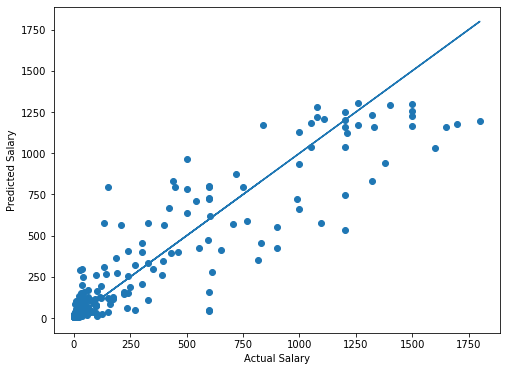

In [354]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.show()

## 9. Documenting of Findings

1. No duplicates values are present.Our 1st model label i.e. primary fuel has 8 unique class. Country and Country long column has only 1 country name i.e India. Year_of_capacity_data contain only one unique value i.e. 2019.
2. Null Values are present in dataset.
3. In power plant coal has highly used primary fuel followed by hydro. Becouse Coal are easily available and comparatively cheaper then other. If we used Solar instead coal is too expensive becouse it reqired land is high and cost of photovoltaic cell is high.
4. This data is belong to perticulary India that's, why it has only one Name i.e. India.
5. VINDH_CHALSTPS is top among the other whose has maximum capacity followed by MUNDRA TPP.
6. Kamuthi soalr power plant has a highest capacity_mw to generate the solar electricity.Tata BP is lowest amont the other.
7. Vindh_chal has top in name whose used coal as primary_fuel. This plant also have maximum capacity to generate electricity.
8. In Wind, Thimmapuram wind farm is in top whose produce 190 mw of capacity.
9. Ratnagiri Gas top amont the other whose used gas as primary fuel.
10. Koyna Complex has highest capacity plant whose used primary fuel as Hydro followed by Nathpa Jhakri. But I observed that, India has more chance to increase the capacity of Hydro plant. Becouse it has a potential.
11. Nuclear is also in race. Nuclear driven plant has very less in our country. We need to increse the number of nuclear plant becouse it has capacity produce major electricity. But it has major consequences i.e. waste management. Nuclear plant are generate radiation as waste, it is very difficult to manage.
12. Oil has very less contribution in energy needs.ThromBay has Highest capacity to generate 490 mw of electricity by using Oil as primary fuel.
13. From commissioning year 1960 onwords, mostly focus on coal and hydro based plant. And their commissioning also increasing year by year.
14. generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017 and generation_gwh_2018 are highly correlated to each others.
15. Random Forest Regressor is best perforaming model. 

## 10.  Model Save

In [356]:
import joblib
joblib.dump(rf,"global_power_capacity_mw.pkl")

['global_power_capacity_mw.pkl']

# 11. Building Model for predicting the primary_fuel (classification model)

In [360]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014
0,2.5,28.1839,73.2407,6,2,2011.0,1,2431.823590
1,98.0,24.7663,74.6090,1,2,2015.0,2,2431.823590
2,39.2,21.9038,69.3732,7,2,2015.0,2,2431.823590
3,135.0,23.8712,91.3602,2,2,2004.0,2,617.789264
4,1800.0,21.9603,82.4091,1,2,2015.0,2,3035.550000


### 11.1 Checking Multicollinearity

In [361]:
x = df.drop(columns=['primary_fuel'],axis=1)
y = df['primary_fuel']

In [362]:
from sklearn.preprocessing import StandardScaler

In [363]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)

In [364]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [365]:
vif = pd.DataFrame()

In [366]:
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,capacity_mw,1.443887
1,latitude,1.053497
2,longitude,1.161220
3,other_fuel1,NaN
4,commissioning_year,1.129666
5,geolocation_source,1.252679
6,generation_gwh_2014,1.343031


- If VIF > 10, It means multicollinearity is present.
- MultiCollinearity is not present, Based on ANOVA F scores.

In [367]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [368]:
from sklearn.preprocessing import StandardScaler

# transform my dataset into standard normal distribution
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.67681976,  1.16207798, -0.93060155, ...,  0.30574897,
        -2.231622  ,  0.32562904],
       [ 0.23351959,  0.59366047, -0.51212062, ...,  0.71697492,
         0.41017196,  0.32562904],
       [-0.26390819,  0.12147159, -2.36385754, ...,  0.71697492,
         0.41017196,  0.32562904],
       ...,
       [-0.49824055, -0.95559329, -0.23832477, ...,  0.71697492,
         0.41017196,  0.32562904],
       [ 0.12386056,  0.5247575 , -0.77079362, ...,  0.71697492,
         0.41017196,  0.32562904],
       [-0.73433912, -1.80227579,  0.24559582, ...,  0.71697492,
         0.41017196,  0.32562904]])

In [369]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [370]:
data['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

### 11.2 Balancing Datasaet

In [371]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(x,y)

In [372]:
smt_y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

## 11.3 LogisticRegression

### Finding Best Random state

In [373]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.6565836298932385 on Random State 206


In [374]:
 x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=206)

In [375]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.6565836298932385

### Cross - validation for logistic Regression

In [376]:
from sklearn.model_selection import cross_val_score

In [377]:
pred_lr = lr.predict(x_test)
accu = accuracy_score(y_test,pred_lr)

In [378]:
for j in range(4,10):
    cross = cross_val_score(lr,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 69.3038540642046
accuracy_score is:- 65.65836298932385


At cv:- 5
Cross validation score is:- 70.48381482770623
accuracy_score is:- 65.65836298932385


At cv:- 6
Cross validation score is:- 69.30459827523057
accuracy_score is:- 65.65836298932385


At cv:- 7
Cross validation score is:- 69.77567886658794
accuracy_score is:- 65.65836298932385


At cv:- 8
Cross validation score is:- 70.01123090745732
accuracy_score is:- 65.65836298932385


At cv:- 9
Cross validation score is:- 70.01368669901704
accuracy_score is:- 65.65836298932385




In [379]:
lsscore_selected = cross_val_score(lr,x,y,cv=8).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7001123090745732 
The accuracy score is:  0.6565836298932385


In [382]:
metric_score(lr,x_train,x_test,y_train, y_test, train=True)

metric_score(lr,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 62.21%

==========================Test Result=======================
Accuracy Score: 65.66%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.47      0.82      0.60        56
           1       0.72      0.47      0.57        80
           2       0.64      0.49      0.56        73
           3       0.67      0.68      0.67        68
           4       0.79      0.90      0.84        62
           5       0.60      0.61      0.61        70
           6       1.00      0.97      0.99        78
           7       0.42      0.37      0.39        75

    accuracy                           0.66       562
   macro avg       0.66      0.67      0.65       562
weighted avg       0.67      0.66      0.65       562


 Confusion Matrix: 
 [[46  0  0  0  0  1  0  9]
 [12 38 11  2 12  2  0  3]
 [ 3  4 36 14  2  8  0  6]
 [ 1  4  7 46  1  9  0  0]
 [ 0  1 

In [381]:
def metric_score(clf, x_train_ns,x_test,y_train_ns,y_test, train=True):
    if train:
        
        y_pred = clf.predict(x_train_ns)

        print("\n========================== Train Result=============================")

        print(f"Accuracy Score: {accuracy_score(y_train_ns, y_pred) * 100:.2f}%")

    
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==========================Test Result=======================")
        print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
        
        print("\n \n Test Classification Report \n", classification_report(y_test, pred, digits=2))
        
        print('\n Confusion Matrix: \n',confusion_matrix(y_test,pred))
    

## 11.4 Random Forest Classifier
### Finding Best Random State

In [383]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9359430604982206 on Random State 247


In [384]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=247)

In [385]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

metric_score(rf,x_train,x_test,y_train, y_test, train=True)

metric_score(rf,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 100.00%

==========================Test Result=======================
Accuracy Score: 93.06%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        61
           1       0.86      0.77      0.81        74
           2       0.85      0.87      0.86        61
           3       0.96      0.92      0.94        75
           4       0.93      1.00      0.96        65
           5       0.96      0.96      0.96        73
           6       1.00      0.99      0.99        79
           7       0.95      0.97      0.96        74

    accuracy                           0.93       562
   macro avg       0.93      0.93      0.93       562
weighted avg       0.93      0.93      0.93       562


 Confusion Matrix: 
 [[59  2  0  0  0  0  0  0]
 [ 5 57  2  2  5  2  0  1]
 [ 0  4 53  1  0  1  0  2]
 [ 0  1  5 69  0  0  0  0]
 [ 0  0

### Cross - Validation for Random Forest classifier

In [386]:
pred_rf = rf.predict(x_test)
accu = accuracy_score(y_test,pred_rf)

In [387]:
for j in range(4,10):
    cross = cross_val_score(rf,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 82.76289904319056
accuracy_score is:- 93.06049822064057


At cv:- 5
Cross validation score is:- 83.82944657152802
accuracy_score is:- 93.06049822064057


At cv:- 6
Cross validation score is:- 84.89161921885926
accuracy_score is:- 93.06049822064057


At cv:- 7
Cross validation score is:- 83.3530106257379
accuracy_score is:- 93.06049822064057


At cv:- 8
Cross validation score is:- 84.18238993710692
accuracy_score is:- 93.06049822064057


At cv:- 9
Cross validation score is:- 83.95172327983079
accuracy_score is:- 93.06049822064057




In [389]:
lsscore_selected = cross_val_score(rf,x,y,cv=6).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.84184064196051 
The accuracy score is:  0.9306049822064056


## 11.5 Gradient Boosting Classifier
### Finding Best Random State

In [390]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train, y_train)
    pred = gbc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9199288256227758 on Random State 289


In [391]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=289)

In [392]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

metric_score(gbc,x_train,x_test,y_train, y_test, train=True)

metric_score(gbc,x_train,x_test,y_train, y_test, train=False)



========================== Train Result=============================
Accuracy Score: 98.85%

==========================Test Result=======================
Accuracy Score: 91.99%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        76
           1       0.95      0.77      0.85        73
           2       0.87      0.85      0.86        78
           3       0.91      0.93      0.92        67
           4       0.97      0.98      0.97        57
           5       0.90      0.96      0.93        73
           6       1.00      1.00      1.00        69
           7       0.88      0.93      0.90        69

    accuracy                           0.92       562
   macro avg       0.92      0.92      0.92       562
weighted avg       0.92      0.92      0.92       562


 Confusion Matrix: 
 [[74  0  0  0  0  0  0  2]
 [ 3 56  3  2  1  1  0  7]
 [ 1  2 66  3  1  5  0  0]
 [ 0  0  4 62  0  1  0  0]
 [ 0  1 

### Cross - validation For GradientBoosting Classifier

In [393]:
pred_gbc = gbc.predict(x_test)
accu = accuracy_score(y_test,pred_gbc)

In [394]:
for j in range(4,10):
    cross = cross_val_score(gbc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 80.16967718858983
accuracy_score is:- 91.99288256227757


At cv:- 5
Cross validation score is:- 81.9366515837104
accuracy_score is:- 91.99288256227757


At cv:- 6
Cross validation score is:- 82.5283854426797
accuracy_score is:- 91.99288256227757


At cv:- 7
Cross validation score is:- 82.76269185360093
accuracy_score is:- 91.99288256227757


At cv:- 8
Cross validation score is:- 81.94294699011681
accuracy_score is:- 91.99288256227757


At cv:- 9
Cross validation score is:- 81.34876197586163
accuracy_score is:- 91.99288256227757




In [395]:
lsscore_selected = cross_val_score(gbc,x,y,cv=7).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8276269185360094 
The accuracy score is:  0.9199288256227758


## 11.6 SVC
### Finding Best Random State

In [396]:
from sklearn.svm import SVC

In [397]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    pred = svc.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.8540925266903915 on Random State 262


In [398]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=262)

In [399]:
svc = SVC()
svc.fit(x_train,y_train)

metric_score(svc,x_train,x_test,y_train, y_test, train=True)

metric_score(svc,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 81.83%

==========================Test Result=======================
Accuracy Score: 85.41%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.99      0.85        78
           1       0.85      0.71      0.78        70
           2       0.91      0.63      0.75        68
           3       0.90      0.82      0.86        68
           4       0.85      1.00      0.92        70
           5       0.79      0.97      0.87        72
           6       1.00      0.96      0.98        77
           7       0.89      0.68      0.77        59

    accuracy                           0.85       562
   macro avg       0.87      0.85      0.85       562
weighted avg       0.87      0.85      0.85       562


 Confusion Matrix: 
 [[77  0  0  0  0  0  0  1]
 [ 6 50  1  4  7  0  0  2]
 [ 2  2 43  1  4 16  0  0]
 [ 1  6  3 56  1  1  0  0]
 [ 0  0 

### Cross - Validation for SVC

In [400]:
pred_svc = svc.predict(x_test)
accu = accuracy_score(y_test,pred_svc)

In [401]:
for j in range(4,10):
    cross = cross_val_score(svc,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 74.26115532504693
accuracy_score is:- 85.40925266903915


At cv:- 5
Cross validation score is:- 74.85067873303167
accuracy_score is:- 85.40925266903915


At cv:- 6
Cross validation score is:- 74.73612359737622
accuracy_score is:- 85.40925266903915


At cv:- 7
Cross validation score is:- 74.61629279811099
accuracy_score is:- 85.40925266903915


At cv:- 8
Cross validation score is:- 74.38230008984725
accuracy_score is:- 85.40925266903915


At cv:- 9
Cross validation score is:- 74.9732487246485
accuracy_score is:- 85.40925266903915




In [402]:
lsscore_selected = cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.7485067873303167 
The accuracy score is:  0.8540925266903915


## 11.7 KNN
### Finding Random State

In [403]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    
    if accuracy>maxAccu:
        maxAccu=accuracy
        maxRS=i

print("Best Accuracy score is", maxAccu,"on Random State", maxRS)

Best Accuracy score is 0.9039145907473309 on Random State 222


In [404]:
x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=222)

In [405]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

metric_score(knn,x_train,x_test,y_train, y_test, train=True)

metric_score(knn,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 90.08%

==========================Test Result=======================
Accuracy Score: 90.39%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.74      0.76      0.75        59
           2       0.91      0.84      0.87        70
           3       0.95      0.80      0.87        69
           4       0.88      1.00      0.94        76
           5       0.94      0.96      0.95        78
           6       0.99      0.97      0.98        74
           7       0.88      0.91      0.90        66

    accuracy                           0.90       562
   macro avg       0.90      0.90      0.90       562
weighted avg       0.91      0.90      0.90       562


 Confusion Matrix: 
 [[66  3  0  0  0  0  0  1]
 [ 1 45  1  2  6  0  0  4]
 [ 0  3 59  1  2  5  0  0]
 [ 0  7  5 55  2  0  0  0]
 [ 0  0 

### Cross - Validation for KNN

In [406]:
pred_knn = knn.predict(x_test)
accu = accuracy_score(y_test,pred_knn)

In [407]:
for j in range(4,10):
    cross = cross_val_score(knn,x,y,cv=j)
    lsc = cross.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',accu*100)
    print('\n')

At cv:- 4
Cross validation score is:- 78.51761602432263
accuracy_score is:- 90.39145907473309


At cv:- 5
Cross validation score is:- 80.04942568743473
accuracy_score is:- 90.39145907473309


At cv:- 6
Cross validation score is:- 78.63683281723438
accuracy_score is:- 90.39145907473309


At cv:- 7
Cross validation score is:- 78.86658795749705
accuracy_score is:- 90.39145907473309


At cv:- 8
Cross validation score is:- 79.22619047619048
accuracy_score is:- 90.39145907473309


At cv:- 9
Cross validation score is:- 78.86773671768074
accuracy_score is:- 90.39145907473309




In [408]:
lsscore_selected = cross_val_score(knn,x,y,cv=5).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",accu)

The cv score is:  0.8004942568743474 
The accuracy score is:  0.9039145907473309


## 12. Selecting Best Model
### Based on comparing Accuracy Score results with Cross Validation results, it is determined Logistic Regression is the best model. It has least difference between accuracy score and cross validation.

## 13. Hyperparameter Tuning

In [409]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [414]:
 x_train, x_test, y_train, y_test = train_test_split(smt_x, smt_y, test_size=0.3, random_state=323)

In [415]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
     'tol': [0.19031,0.09030],
    }]

In [416]:
gridsearch = GridSearchCV(lr, param_grid=param_grid)

In [417]:
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'C': 0.0006951927961775605,
 'max_iter': 5000,
 'penalty': 'none',
 'solver': 'sag',
 'tol': 0.0903}

In [419]:
lr = LogisticRegression(C=0.8, max_iter = 5000, penalty='l1',solver ='saga',tol=0.0903)
lr.fit(x_train,y_train)

metric_score(lr,x_train,x_test,y_train, y_test, train=True)

metric_score(lr,x_train,x_test,y_train, y_test, train=False)


========================== Train Result=============================
Accuracy Score: 64.89%

==========================Test Result=======================
Accuracy Score: 67.62%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.56      0.99      0.72        67
           1       0.56      0.64      0.60        64
           2       0.65      0.48      0.56        66
           3       0.68      0.61      0.64        71
           4       0.84      0.86      0.85        65
           5       0.65      0.79      0.71        80
           6       1.00      0.99      0.99        70
           7       0.37      0.13      0.19        79

    accuracy                           0.68       562
   macro avg       0.66      0.68      0.66       562
weighted avg       0.66      0.68      0.65       562


 Confusion Matrix: 
 [[66  0  0  0  0  0  0  1]
 [ 5 41  5  2  9  1  0  1]
 [ 0 11 32  8  0 13  0  2]
 [ 0 11 10 43  2  5  0  0]
 [ 0  1 

## 14.  ROC_AUC Curve

In [459]:
from sklearn.metrics import roc_curve, auc

In [460]:
#predicting the data
y_pred_cnb = lr.predict(x_test)
y_prob_pred_cnb = lr.predict_proba(x_test)

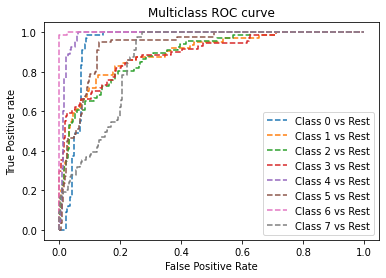

In [461]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--', label='Class 3 vs Rest')

plt.plot(fpr[4], tpr[4], linestyle='--', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--', label='Class 7 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')


## 15.  Model Save

In [462]:
import joblib
joblib.dump(lr,"global_fuel_prediction.pkl")

['global_fuel_prediction.pkl']

### Loading the model

In [463]:
mod=joblib.load("global_fuel_prediction.pkl")

In [464]:
print(mod.predict(x))

[6 1 7 1 1 2 3 2 2 1 1 3 1 3 3 3 1 1 0 7 0 3 2 1 1 6 0 6 2 0 0 6 6 6 6 6 6
 6 4 0 1 1 3 1 1 3 1 7 1 3 3 3 3 3 1 7 2 3 2 3 1 1 2 3 1 3 0 7 1 7 0 5 0 0
 4 3 0 4 0 0 5 3 3 2 5 5 5 7 1 3 3 5 4 7 1 1 2 1 3 3 1 1 1 7 5 5 1 3 1 1 6
 6 0 6 6 6 6 6 6 6 6 7 0 0 7 2 6 1 6 6 6 6 3 3 3 2 1 7 1 1 0 1 1 5 3 3 3 3
 1 0 6 6 7 6 1 4 3 2 2 0 7 0 4 1 2 3 3 4 2 1 2 2 7 1 3 0 5 3 3 0 1 0 3 1 6
 7 1 6 7 6 6 6 6 6 6 3 3 7 2 7 0 7 1 3 0 2 7 1 1 3 1 4 3 4 3 2 5 7 3 5 2 1
 0 3 0 1 3 1 0 1 1 3 0 6 6 6 6 6 6 7 6 1 6 6 1 3 7 3 0 5 5 0 3 0 0 7 0 7 5
 1 0 6 1 3 3 4 2 0 1 1 4 1 1 1 6 6 3 7 3 4 2 1 1 1 2 3 1 1 4 6 6 5 7 7 7 7
 2 2 5 4 1 5 4 4 3 2 3 0 0 1 3 7 5 1 3 2 1 5 1 1 0 5 1 4 2 0 3 1 3 3 5 7 1
 0 5 3 1 5 1 2 7 7 7 0 2 2 0 0 4 4 3 4 1 1 5 4 0 3 4 4 0 1 2 5 5 3 5 1 1 3
 4 1 4 2 6 6 0 6 6 6 6 6 6 6 6 6 6 6 6 7 7 6 7 0 0 4 1 1 1 3 3 3 3 0 7 7 0
 3 1 3 3 2 3 0 3 6 6 6 5 0 6 7 4 5 3 1 1 1 0 3 7 1 1 3 3 1 2 2 0 3 3 1 3 2
 1 2 3 1 1 1 2 4 3 1 2 3 1 1 3 7 1 0 3 0 7 7 5 3 0 7 1 7 6 1 6 6 6 7 7 6 6
 3 1 4 0 1 5 0 0 1 0 3 3 

In [467]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(x), 'Actual Values': y})
Prediction_accuracy.head(10)

,Predictions,Actual Values
0,6,6
1,1,1
2,7,7
3,1,2
4,1,1
5,2,1
6,3,3
7,2,3
8,2,3
9,1,1
